In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('Detalle precios y productos fabricados 2022.csv')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   CVE_DOC                    1426 non-null   object
 1   FECHA_DOC                  1426 non-null   object
 2   NOMBRE_VENDEDOR            1424 non-null   object
 3   NOMBRE_CLIENTE             1426 non-null   object
 4   CANT                       1426 non-null   int64 
 5   CVE_ART                    1426 non-null   object
 6   DESCR                      1426 non-null   object
 7   PRECIO_UNITARIO            1426 non-null   object
 8   COSTO_UNITARIO             1426 non-null   object
 9   COSTO_UNITARIO_CALCULADO   1426 non-null   object
 10  SUBTOTAL_PARTIDA           1426 non-null   object
 11  COSTO_TOTAL_CALCULADO      1426 non-null   object
 12  MARGEN_UNITARIO_CALCULADO  1426 non-null   object
 13  MARGEN_TOTAL_CALCULADO     1426 non-null   object
dtypes: int64

In [59]:
monetary_columns = [
    "PRECIO_UNITARIO", "COSTO_UNITARIO", "COSTO_UNITARIO_CALCULADO", 
    "SUBTOTAL_PARTIDA", "COSTO_TOTAL_CALCULADO","CANT", 
    "MARGEN_UNITARIO_CALCULADO", "MARGEN_TOTAL_CALCULADO"
]

# Limpiar las columnas (eliminar $ y convertir a float)
for col in monetary_columns:
    df[col] = df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Seleccionar solo columnas numéricas
df_numericas = df.select_dtypes(include=['number'])

In [60]:
valores_nulos=df.isnull().sum()
valores_nulos

CVE_DOC                      0
FECHA_DOC                    0
NOMBRE_VENDEDOR              2
NOMBRE_CLIENTE               0
CANT                         0
CVE_ART                      0
DESCR                        0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64

In [61]:
#Creación de 2 dataframes para poder procesar los outliers
#cuantitativas= df.iloc[ : , 7:14 ] 
cuantitativas = df.iloc[:, list(range(7, 14)) + [4]]
cualitativas = df.iloc[ : , [0,1,2,3,5,6]]

In [62]:
cuantitativas

,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO,CANT
0,434.48,52.80,52.80,434.48,52.80,381.68,381.68,1.0
1,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87,1.0
2,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56,7.0
3,140.00,38.96,38.96,140.00,38.96,101.04,101.04,1.0
4,172.41,101.71,101.71,344.83,203.42,70.71,141.41,2.0
...,...,...,...,...,...,...,...,...
1421,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12,6.0
1422,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48,6.0
1423,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41,3.0
1424,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49,4025.49,1.0


In [63]:
cualitativas

,CVE_DOC,FECHA_DOC,NOMBRE_VENDEDOR,NOMBRE_CLIENTE,CVE_ART,DESCR
0,F37034,05/01/2022 0:00,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V"
1,F37036,05/01/2022 0:00,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT"
2,F37041,05/01/2022 0:00,DIEGO ARMANDO LEON DURAN,ANA BARBARA CRUZ PALACIOS,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT
3,F37042,05/01/2022 0:00,DIEGO ARMANDO LEON DURAN,OMAR RODRIGUEZ GOMEZ,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT
4,F37043,05/01/2022 0:00,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,BP00242,BAN P INOX 115MMX235MM 1000W 127V T/TOR
...,...,...,...,...,...,...
1421,F39834,23/12/2022 0:00,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,CS12F1040A00,"CAS INOX 1/2""ØX3"" 400W 127V EXT.30CM"
1422,F39834,23/12/2022 0:00,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,CS12H1050A00,"CAS INOX 1/2""ØX4"" 500W 127V EXT30CM"
1423,F39835,23/12/2022 0:00,LETICIA RAMIREZ HERNANDEZ,SEVEN DAYS ALL SPORT,TUE00394,"TUB INOX 5/16""ØX300MM 5300W 220V ""M"" ESP"
1424,F39837,23/12/2022 0:00,LETICIA RAMIREZ HERNANDEZ,REVUELTA MONTECARLO,TUA00470,"TUB INOX 1/2""ØX500MM 10KW 220V 2 1/2""NPT"


<Figure size 1500x800 with 0 Axes>

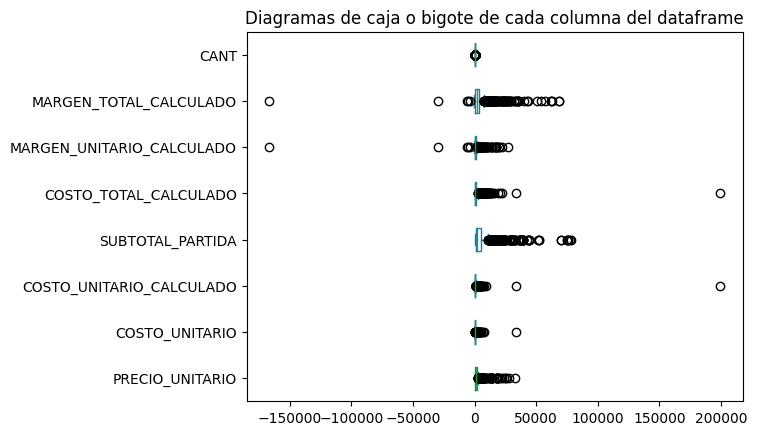

In [64]:
# Realizamos diagramas de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize=(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de cada columna del dataframe')
plt.show()

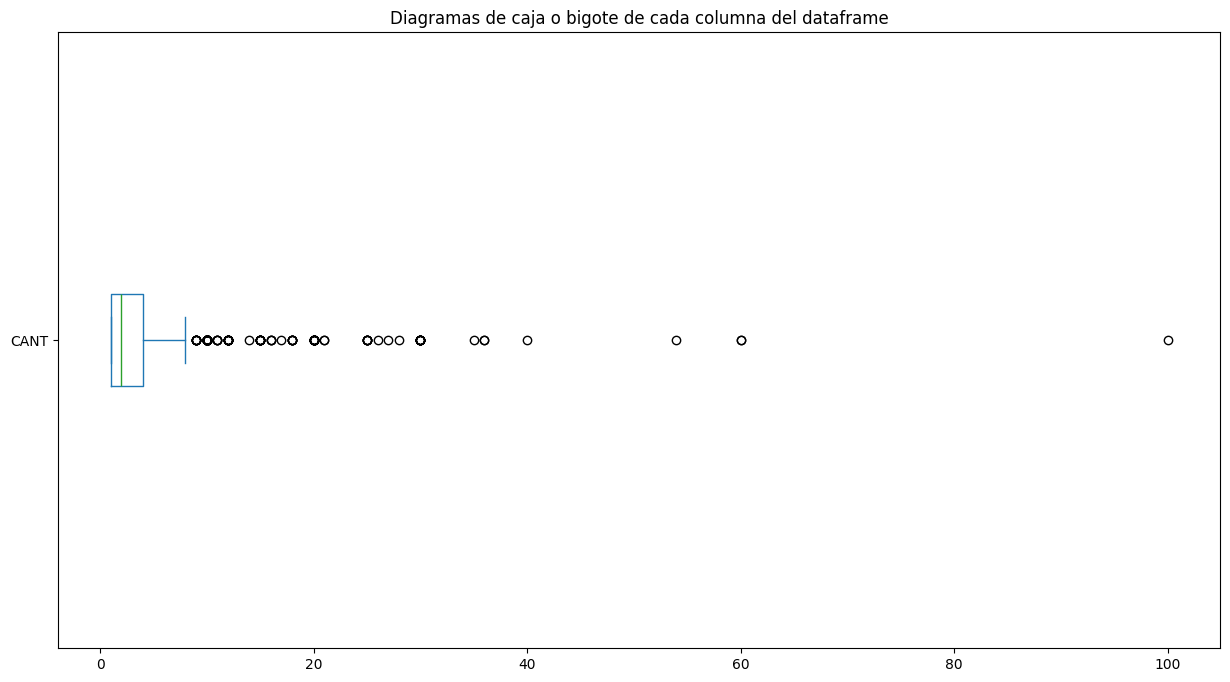

In [65]:
# Realizamos diagramas de caja o bigote para una columna del dataframe
fig = plt.figure(figsize=(15, 8))
cuantitativas['CANT'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de cada columna del dataframe')
plt.show()

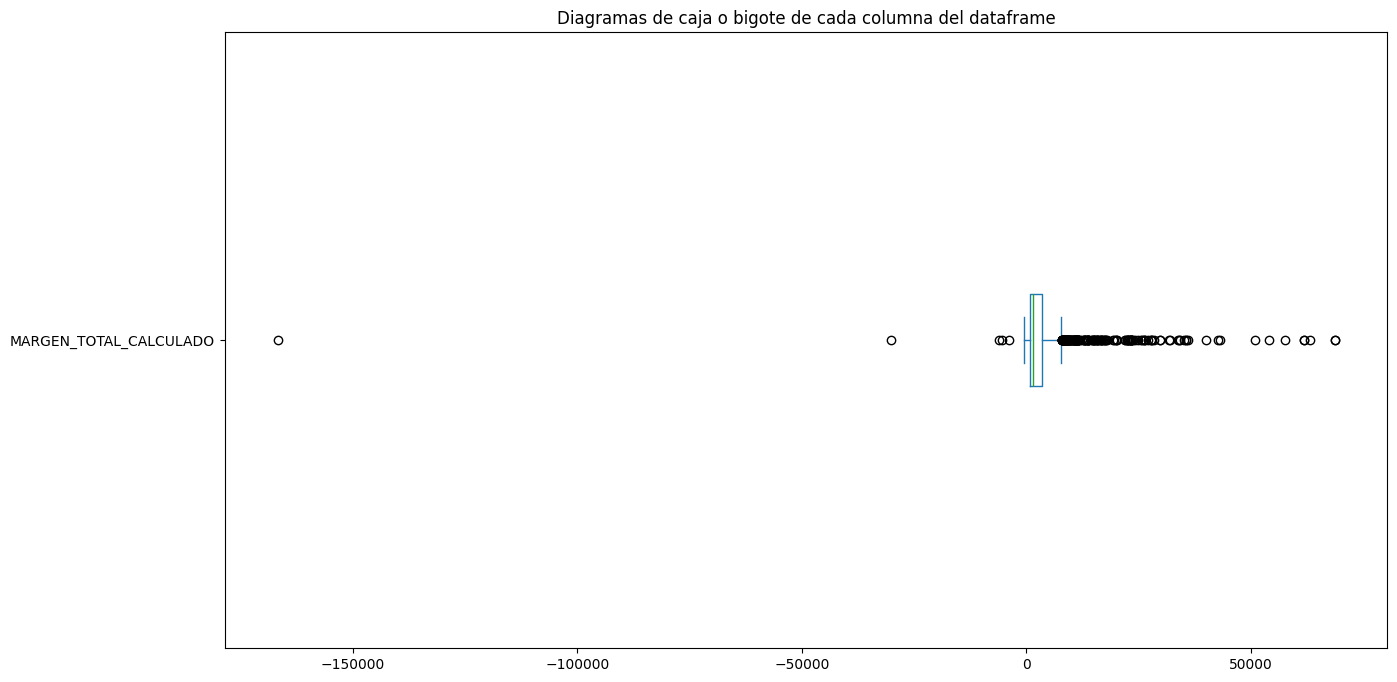

In [66]:
# Realizamos diagramas de caja o bigote para una columna del dataframe
fig = plt.figure(figsize=(15, 8))
cuantitativas['MARGEN_TOTAL_CALCULADO'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de cada columna del dataframe')
plt.show()


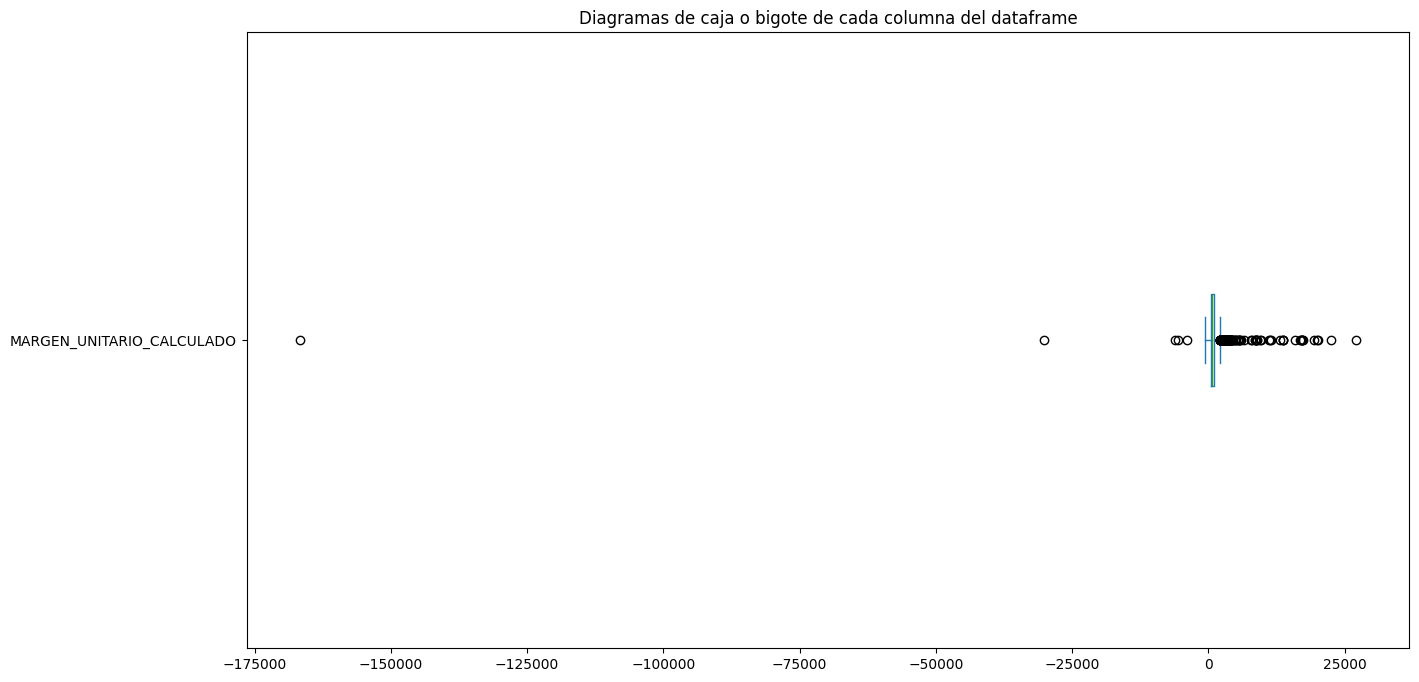

In [67]:
# Realizamos diagramas de caja o bigote para una columna del dataframe
fig = plt.figure(figsize=(15, 8))
cuantitativas['MARGEN_UNITARIO_CALCULADO'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de cada columna del dataframe')
plt.show()

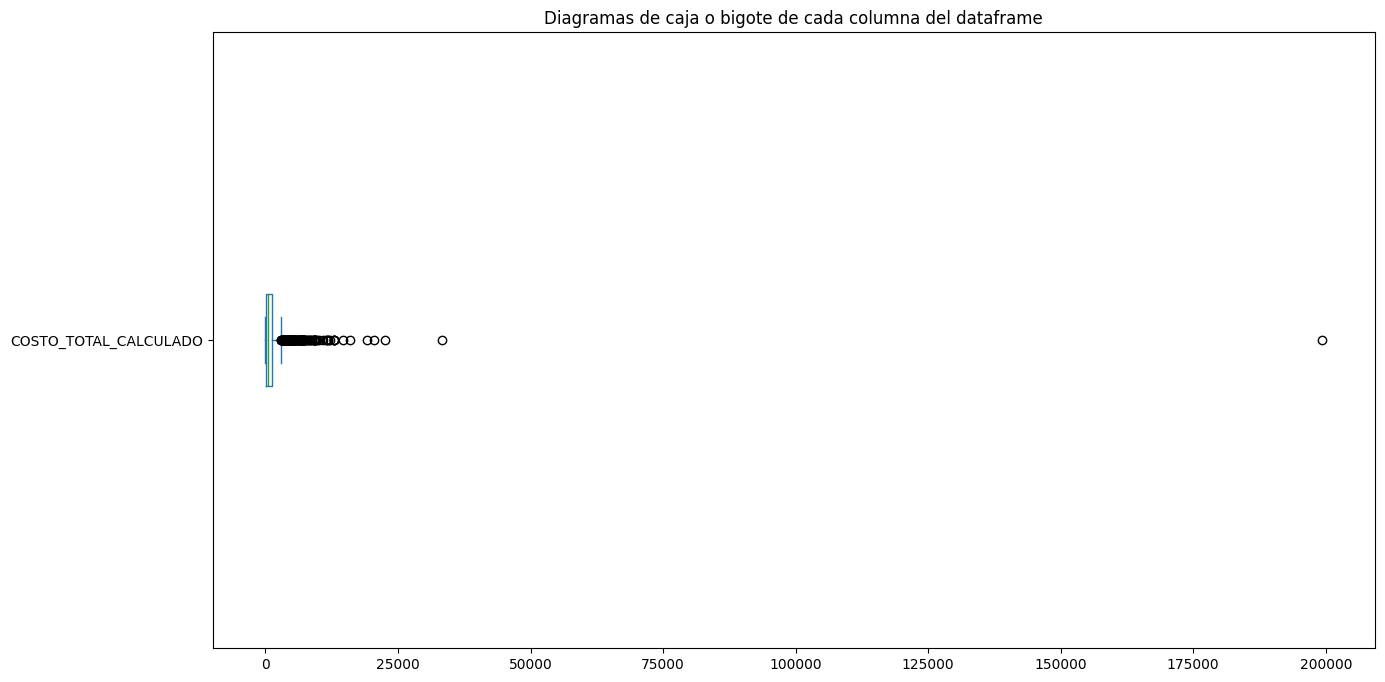

In [68]:
# Realizamos diagramas de caja o bigote para una columna del dataframe
fig = plt.figure(figsize=(15, 8))
cuantitativas['COSTO_TOTAL_CALCULADO'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de cada columna del dataframe')
plt.show()

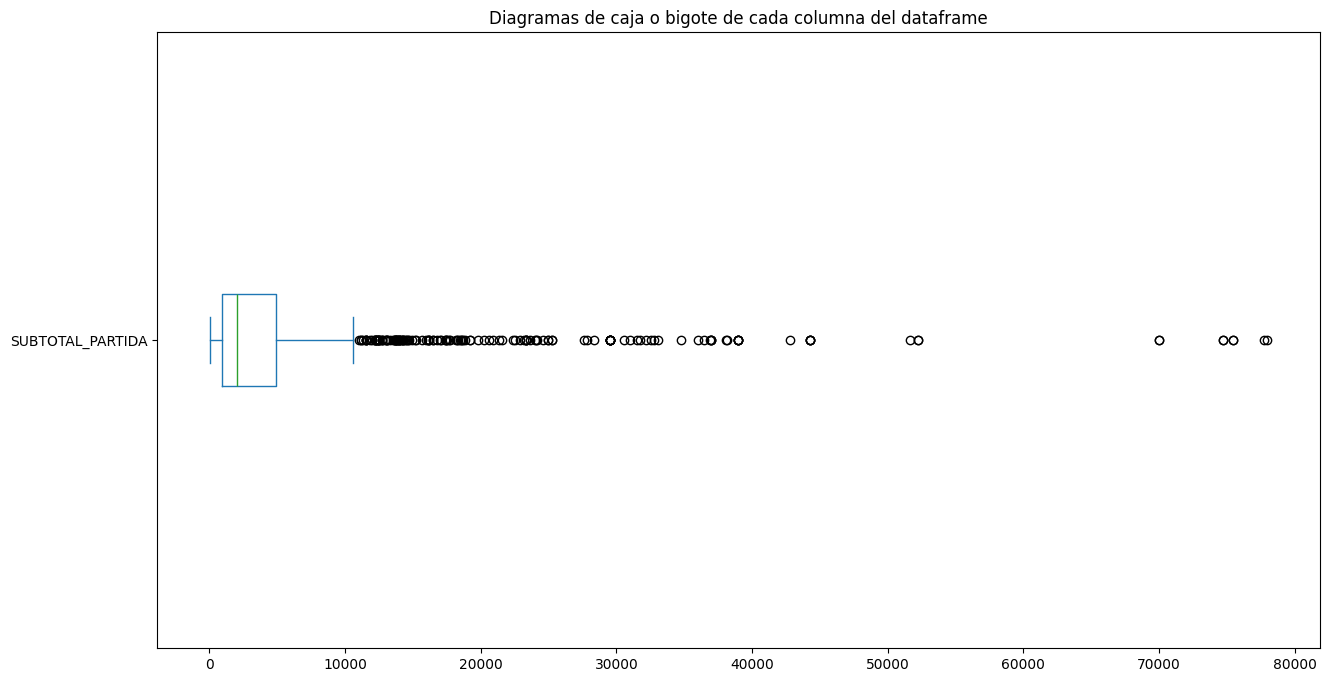

In [69]:
# Realizamos diagramas de caja o bigote para una columna del dataframe
fig = plt.figure(figsize=(15, 8))
cuantitativas['SUBTOTAL_PARTIDA'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de cada columna del dataframe')
plt.show()

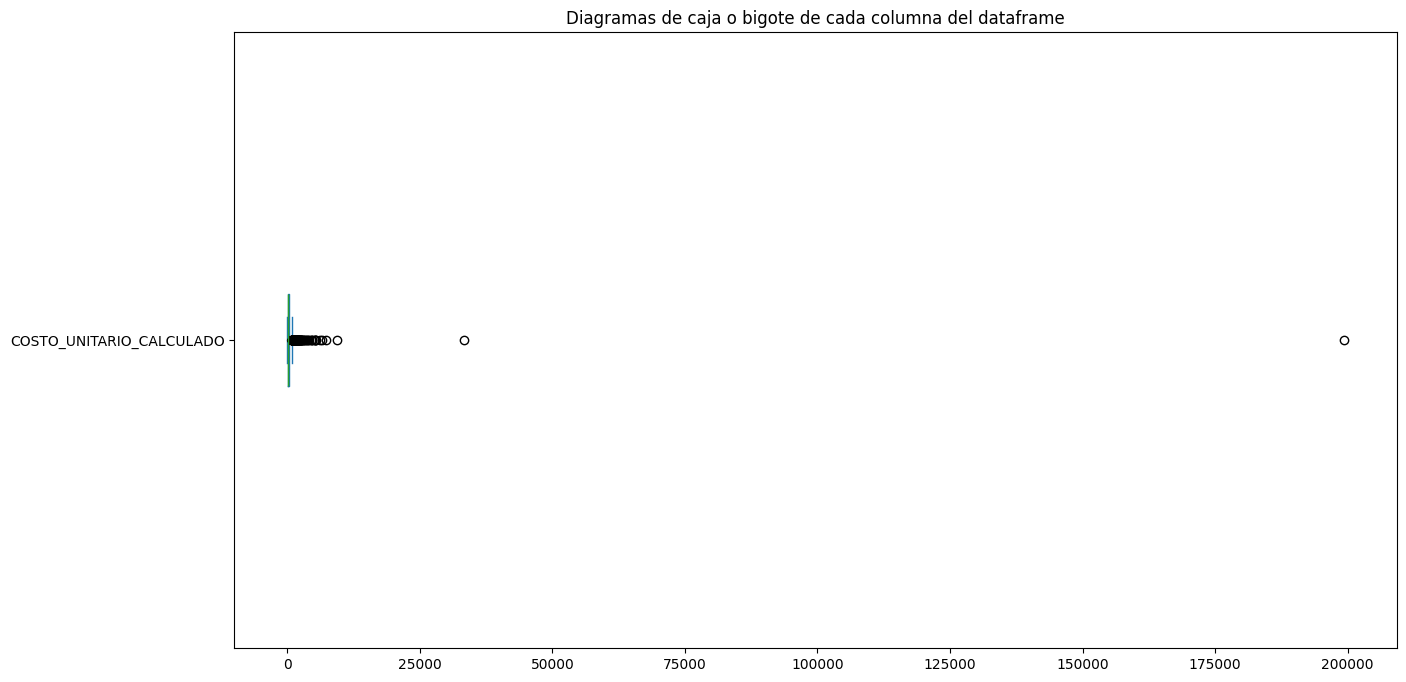

In [70]:
# Realizamos diagramas de caja o bigote para una columna del dataframe
fig = plt.figure(figsize=(15, 8))
cuantitativas['COSTO_UNITARIO_CALCULADO'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de cada columna del dataframe')
plt.show()

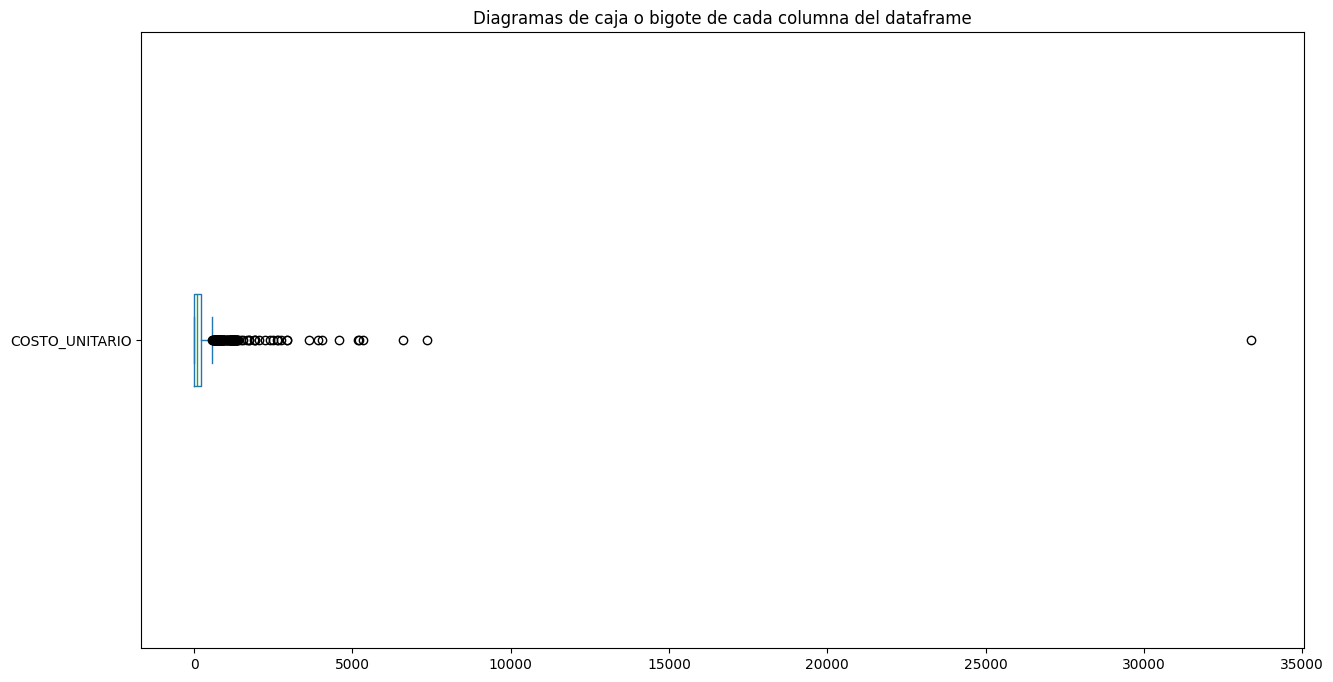

In [71]:
# Realizamos diagramas de caja o bigote para una columna del dataframe
fig = plt.figure(figsize=(15, 8))
cuantitativas['COSTO_UNITARIO'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de cada columna del dataframe')
plt.show()

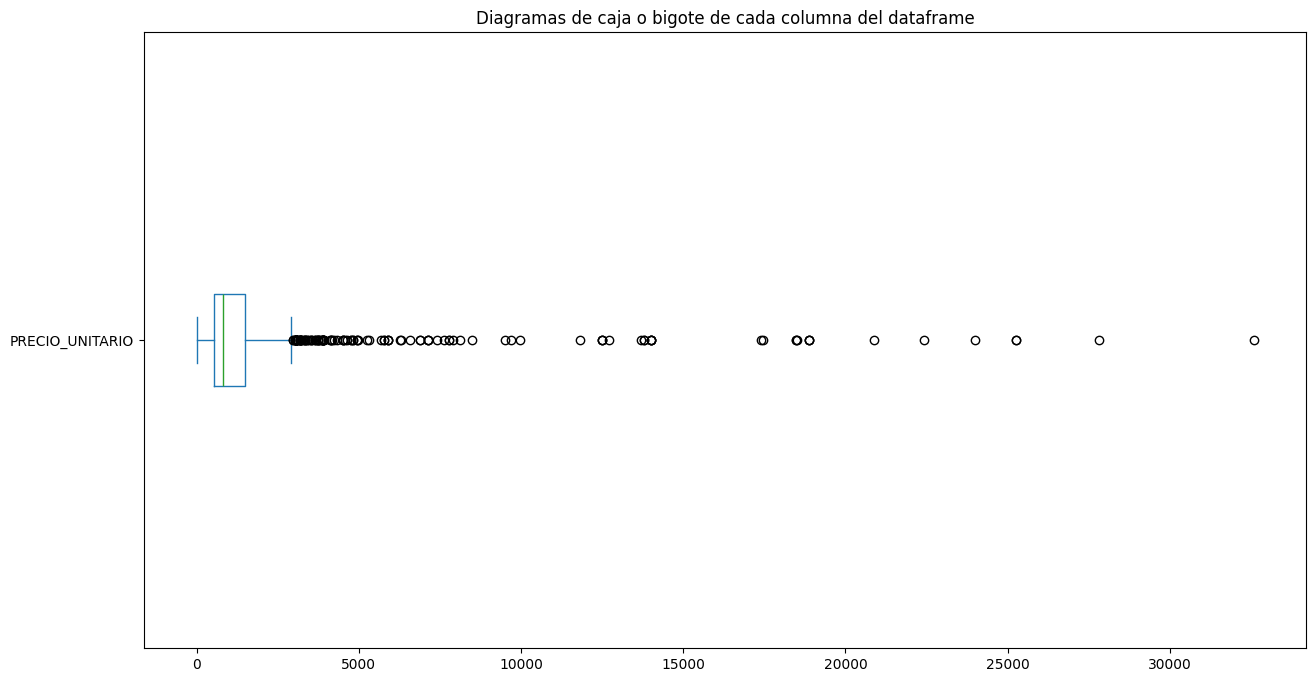

In [72]:
# Realizamos diagramas de caja o bigote para una columna del dataframe
fig = plt.figure(figsize=(15, 8))
cuantitativas['PRECIO_UNITARIO'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de cada columna del dataframe')
plt.show()

**PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINACIÓN DE OUTLIERS EN DATAFRAME**

In [73]:
#Método aplicando desviación estándar. Encuentro los valores extremos

y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Límite superior permitido", Limite_Superior)
print("Límite inferior permitido", Limite_Inferior)

Límite superior permitido PRECIO_UNITARIO               9533.970813
COSTO_UNITARIO                3313.473534
COSTO_UNITARIO_CALCULADO     16686.790475
SUBTOTAL_PARTIDA             31402.663810
COSTO_TOTAL_CALCULADO        18629.377526
MARGEN_UNITARIO_CALCULADO    16001.398440
MARGEN_TOTAL_CALCULADO       28691.369713
CANT                            22.531793
dtype: float64
Límite inferior permitido PRECIO_UNITARIO              -6499.204684
COSTO_UNITARIO               -2821.614250
COSTO_UNITARIO_CALCULADO    -15603.765678
SUBTOTAL_PARTIDA            -21404.897036
COSTO_TOTAL_CALCULADO       -15803.336348
MARGEN_UNITARIO_CALCULADO   -14049.656995
MARGEN_TOTAL_CALCULADO      -21519.643893
CANT                           -14.324219
dtype: float64


In [74]:
#Obtenemos datos y los outliers se convierten en nulos en el dataframe
df1=cuantitativas [(y<=Limite_Superior)&(y>=Limite_Inferior)]
df1

,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO,CANT
0,434.48,52.80,52.80,434.48,52.80,381.68,381.68,1.0
1,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87,1.0
2,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56,7.0
3,140.00,38.96,38.96,140.00,38.96,101.04,101.04,1.0
4,172.41,101.71,101.71,344.83,203.42,70.71,141.41,2.0
...,...,...,...,...,...,...,...,...
1421,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12,6.0
1422,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48,6.0
1423,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41,3.0
1424,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49,4025.49,1.0


In [75]:
valores_nulos1= df1.isnull().sum()
valores_nulos1

PRECIO_UNITARIO              29
COSTO_UNITARIO               10
COSTO_UNITARIO_CALCULADO      2
SUBTOTAL_PARTIDA             36
COSTO_TOTAL_CALCULADO         5
MARGEN_UNITARIO_CALCULADO    13
MARGEN_TOTAL_CALCULADO       24
CANT                         28
dtype: int64

In [76]:
df_clean=df1.copy()
df_clean=df_clean.fillna(round(df1.mean(),1))
df_clean

valores_nulos=df_clean.isnull().sum().sum()
valores_nulos

np.int64(0)

In [77]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75

y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q1
iqr=percentile75-percentile25

Limite_Superior_iqr=percentile75 + 1.5*iqr
Limite_Inferior_iqr=percentile25 + 1.5*iqr

In [78]:
#Obtenemos datos limpios del Dataframe

df1_iqr=cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df1_iqr

,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO,CANT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1423,2182.35,NaN,596.55,NaN,NaN,1585.8,NaN,NaN
1424,NaN,NaN,NaN,NaN,1884.35,NaN,NaN,NaN


In [79]:
valores_nulos=df1_iqr.isnull().sum()
valores_nulos

PRECIO_UNITARIO              1303
COSTO_UNITARIO               1333
COSTO_UNITARIO_CALCULADO     1320
SUBTOTAL_PARTIDA             1324
COSTO_TOTAL_CALCULADO        1336
MARGEN_UNITARIO_CALCULADO    1311
MARGEN_TOTAL_CALCULADO       1333
CANT                         1310
dtype: int64

In [80]:
valores_nulos=df1_iqr.isnull().sum().sum()
valores_nulos

np.int64(10570)

In [81]:
df_clean_iqr=df1.copy()
df_clean_iqr=df_clean.fillna(round(df1.mean(),1))
df_clean_iqr

valores_nulos=df_clean_iqr.isnull().sum().sum()
valores_nulos

np.int64(0)

In [82]:
#Union del dataframe cuantitativo con el cualitativo 

Datos_limpios = pd.concat([cualitativas, df_clean_iqr], axis=1)
Datos_limpios

,CVE_DOC,FECHA_DOC,NOMBRE_VENDEDOR,NOMBRE_CLIENTE,CVE_ART,DESCR,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO,CANT
0,F37034,05/01/2022 0:00,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V",434.48,52.80,52.80,434.48,52.80,381.68,381.68,1.0
1,F37036,05/01/2022 0:00,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT",1264.05,327.18,327.18,1264.05,327.18,936.87,936.87,1.0
2,F37041,05/01/2022 0:00,DIEGO ARMANDO LEON DURAN,ANA BARBARA CRUZ PALACIOS,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56,7.0
3,F37042,05/01/2022 0:00,DIEGO ARMANDO LEON DURAN,OMAR RODRIGUEZ GOMEZ,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT,140.00,38.96,38.96,140.00,38.96,101.04,101.04,1.0
4,F37043,05/01/2022 0:00,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,BP00242,BAN P INOX 115MMX235MM 1000W 127V T/TOR,172.41,101.71,101.71,344.83,203.42,70.71,141.41,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,F39834,23/12/2022 0:00,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,CS12F1040A00,"CAS INOX 1/2""ØX3"" 400W 127V EXT.30CM",712.00,102.31,102.31,4272.00,613.88,609.69,3658.12,6.0
1422,F39834,23/12/2022 0:00,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,CS12H1050A00,"CAS INOX 1/2""ØX4"" 500W 127V EXT30CM",718.60,104.69,104.69,4311.60,628.12,613.91,3683.48,6.0
1423,F39835,23/12/2022 0:00,LETICIA RAMIREZ HERNANDEZ,SEVEN DAYS ALL SPORT,TUE00394,"TUB INOX 5/16""ØX300MM 5300W 220V ""M"" ESP",2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41,3.0
1424,F39837,23/12/2022 0:00,LETICIA RAMIREZ HERNANDEZ,REVUELTA MONTECARLO,TUA00470,"TUB INOX 1/2""ØX500MM 10KW 220V 2 1/2""NPT",5909.84,1884.35,1884.35,5909.84,1884.35,4025.49,4025.49,1.0


In [83]:
Datos_limpios.to_csv('Datos_Limpios_Detalle precios y productos fabricados 2022.csv')